## Codsoft Task: 2

## Sales Prediction Project

#### Problem Statment : 
Sales prediction involves forecasting the amount of a product thatcustomers will purchase, taking into account various factors such asadvertising expenditure, target audience segmentation, and advertising platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

<img src="images.jpeg" width="300" height="250">

## Imported Required Library

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##  Data Preprossing


In [167]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [169]:
data.duplicated().sum()

0

In [119]:
data['TV']=data['TV'].astype(int)
data['Newspaper']=data['Newspaper'].astype(int)
data['Radio']=data['Radio'].astype(int)
data['Sales']=data['Sales'].astype(int)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int32
 1   Radio      200 non-null    int32
 2   Newspaper  200 non-null    int32
 3   Sales      200 non-null    int32
dtypes: int32(4)
memory usage: 3.2 KB


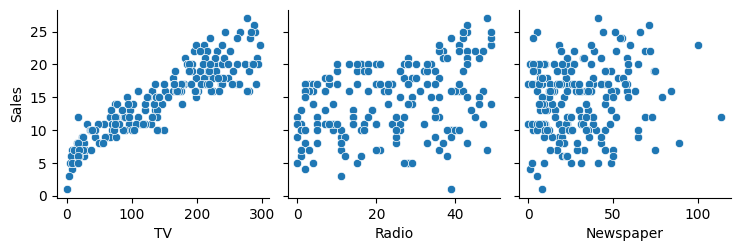

In [121]:
sns.pairplot(data,x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')

<Axes: >

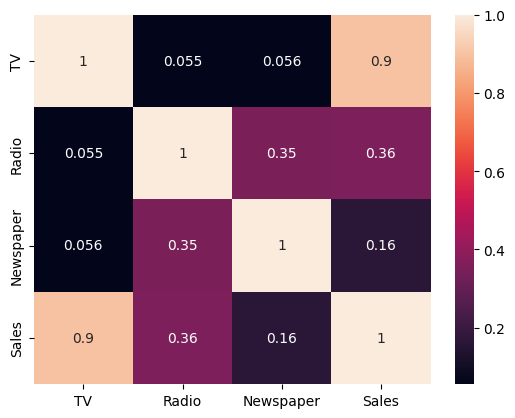

In [122]:
sns.heatmap(data.corr(), fmt='.2g', annot=True)

### By using the heatmap. We cann directly say that highest sales in "TV".

<Axes: >

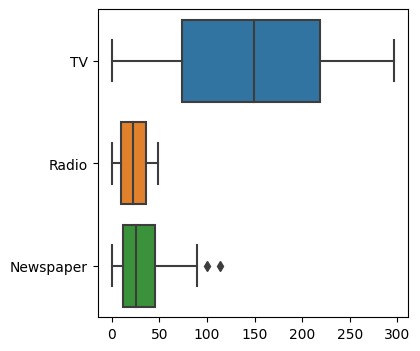

In [123]:
plt.figure(figsize=(4,4))
sns.boxplot(data[['TV','Radio','Newspaper']],orient='h')

<Axes: xlabel='TV', ylabel='Density'>

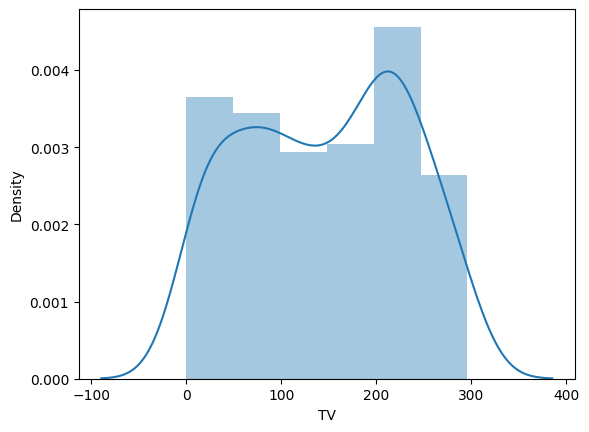

In [124]:
sns.distplot(data['TV'])

<Axes: xlabel='Newspaper', ylabel='Density'>

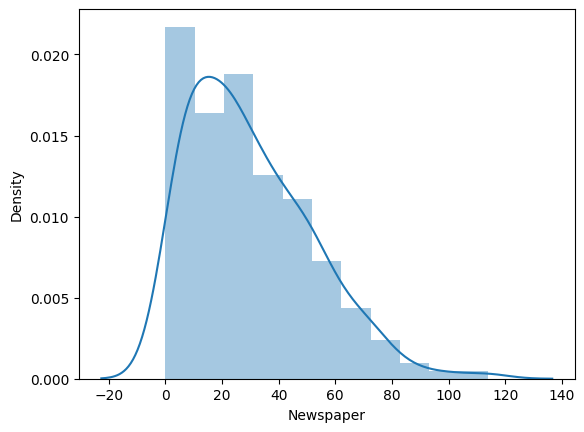

In [125]:
sns.distplot(data['Newspaper'])

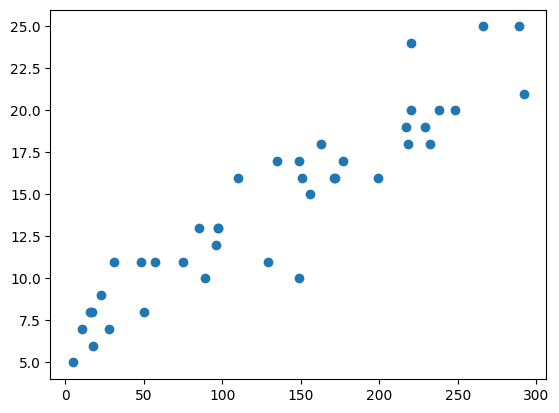

In [166]:
plt.scatter(X_test['TV'], Y_test, label='Actual Sales')

In [126]:
x=data.iloc[:, 0:-1]
y=data.iloc[:,-1]


In [127]:
x.head(4)

,TV,Radio,Newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58


In [128]:
y.head(4)

0    22
1    10
2    12
3    16
Name: Sales, dtype: int32

### Spliting data into tain and test 

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [130]:
X_train

,TV,Radio,Newspaper
61,261,42,54
151,121,8,48
31,112,17,38
150,280,13,37
148,38,40,11
...,...,...,...
100,222,4,49
192,17,4,31
44,25,25,43
132,8,27,2


##  Normalize data

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(X_train)
x_test_scaled=Sc.fit_transform(X_test)

## Building Linear Regerssion Model

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
liner_reg=LinearRegression()

In [135]:
liner_reg.fit(x_train_scaled,Y_train)

LinearRegression()

In [136]:
y_pred=liner_reg.predict(x_test_scaled)

In [137]:
from sklearn.metrics import r2_score

In [138]:
r2_score(Y_test,y_pred)

0.91330164254393